# LSTM Train - Trafik - No PCA

In [2]:
import pandas as pd
import sys
from pathlib import Path
sys.path.append('../..')
from src import config
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split

In [3]:
DATASET_PATH = config.DATA_TRAFIK
df = pd.read_parquet(DATASET_PATH)
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1
data_array = df.values

Epoch 1/10  Train Loss: 75057.6968  Val Loss: 65299.6490  Val MSE: 65291.1602  Val R2: -0.9614
Epoch 2/10  Train Loss: 57223.2799  Val Loss: 50250.9114  Val MSE: 50244.9961  Val R2: -0.5094
Epoch 3/10  Train Loss: 44417.5313  Val Loss: 39410.9050  Val MSE: 39407.2305  Val R2: -0.1838
Epoch 4/10  Train Loss: 35258.0409  Val Loss: 31722.3652  Val MSE: 31720.6211  Val R2: 0.0471
Epoch 5/10  Train Loss: 28849.8908  Val Loss: 26440.5445  Val MSE: 26440.4453  Val R2: 0.2057
Epoch 6/10  Train Loss: 24541.8931  Val Loss: 22975.7231  Val MSE: 22976.9883  Val R2: 0.3098
Epoch 7/10  Train Loss: 21804.5302  Val Loss: 20852.3542  Val MSE: 20854.6953  Val R2: 0.3735
Epoch 8/10  Train Loss: 20185.8223  Val Loss: 19648.8318  Val MSE: 19651.9902  Val R2: 0.4096
Epoch 9/10  Train Loss: 19311.8668  Val Loss: 19034.9857  Val MSE: 19038.6855  Val R2: 0.4281
  >> Model saved to /home/orhankocak_0233/MLProject_570/models/lstm_trafik_nopca.pt (val_loss improved)
Epoch 10/10  Train Loss: 18884.6873  Val Loss: 

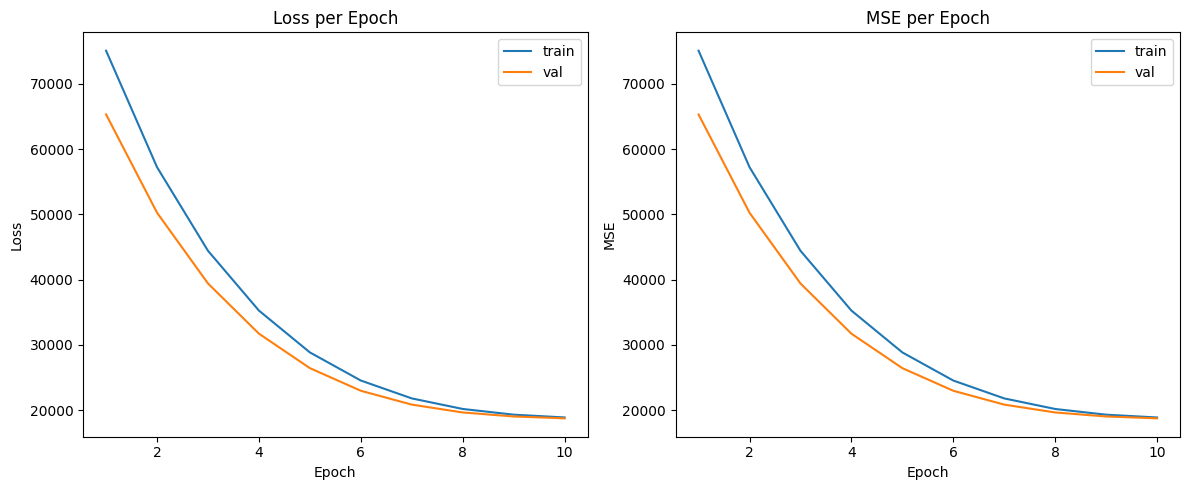

== Final Metrics ==
mse: 18752.90234375
mae: 107.60005187988281
r2: 0.4366496801376343


In [4]:
# PCA kullanılmıyor
dataset = TrafficDataset(data_array, X_STEP, Y_STEP)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds, batch_size=100, shuffle=True, num_workers=8)
val_loader = DataLoader(val_ds, batch_size=100, num_workers=8)
predictor = TrafficPredictor('lstm', dataset.sensors, X_STEP, Y_STEP, pca_model=dataset.pca if False else None)
predictor.train(train_loader, val_loader, epochs=10, save_path=config.PROJECT_ROOT.joinpath('models/lstm_trafik_nopca.pt'), save_optimizer=True)
predictor.show()